In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import re

In [2]:
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [3]:
length = "high"
version = "2"
file = pd.read_csv("matches_"+length+version+".csv", sep=',', header=None, names=['word', 'text'])
dataset = file.drop_duplicates().reset_index(drop=True)

In [4]:
found_sents = []
joint_word = []

for index, row in dataset.iterrows():
        sentences_list = row.text.split('.')
        for sent_index, sentence in enumerate(sentences_list):
            # Check if there is an exact match of the word in the sentence
            if re.search(r'\b' + row['word'] + r'\b', sentence):
                found_sents.append(sentences_list[sent_index-1] + ". " + sentence + ". " + sentences_list[sent_index+1])
                joint_word.append(row['word'])

In [5]:
sentiment_df = pd.DataFrame(columns=['word', 'sent'])
sentiment_df['word'] = joint_word
sentiment_df['sent'] = found_sents

In [6]:
scores = []
for index, row in sentiment_df.iterrows():
    scores.append(analyser.polarity_scores(row.sent))
    
sentiment_df['neg'] = [item['neg'] for item in scores]
sentiment_df['neu'] = [item['neu'] for item in scores]
sentiment_df['pos'] = [item['pos'] for item in scores]
sentiment_df['comp'] = [item['compound'] for item in scores]

In [7]:
# All sents
print(sentiment_df[['word', 'neg', 'neu', 'pos', 'comp']].sort_values(by=['comp'], ascending=[True]).head())
print(sentiment_df[['word', 'neg', 'neu', 'pos', 'comp']].sort_values(by=['comp'], ascending=[True]).tail())

            word    neg    neu    pos    comp
375  hearing aid  0.224  0.744  0.032 -0.9999
535  hearing aid  0.224  0.744  0.032 -0.9999
58   hearing aid  0.168  0.755  0.077 -0.9605
916        cissy  0.291  0.709  0.000 -0.9349
814  hearing aid  0.151  0.849  0.000 -0.9274
            word    neg    neu    pos    comp
276        devry  0.003  0.938  0.059  0.9992
460  hearing aid  0.107  0.501  0.392  0.9993
262        kunta  0.041  0.873  0.086  0.9995
261        kunta  0.038  0.875  0.087  0.9995
457  hearing aid  0.020  0.911  0.069  1.0000


In [8]:
# Grouped by word
grouped_df = sentiment_df.groupby(['word'])[['neg', 'neu', 'pos', 'comp']].mean().sort_values(by=['comp'], ascending=[True])
print(grouped_df.head())
print(grouped_df.tail())

                      neg       neu       pos      comp
word                                                   
chinless wonder  0.161500  0.838500  0.000000 -0.833900
blue eyed devil  0.253000  0.747000  0.000000 -0.659700
saala            0.051100  0.931800  0.017100 -0.178070
barking cat      0.069750  0.887250  0.043250 -0.092900
texass           0.108857  0.835643  0.055214 -0.081407
               neg     neu     pos     comp
word                                       
melanzane   0.0118  0.8918  0.0964  0.54700
deadmonton  0.0000  0.8430  0.1570  0.68080
schwartze   0.0126  0.7976  0.1898  0.75688
peg boy     0.0000  0.5760  0.4240  0.84450
gowl        0.0330  0.9000  0.0670  0.99210


<AxesSubplot:xlabel='index'>

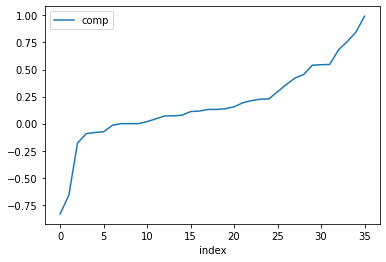

In [9]:
# Grouped by words
tmp = grouped_df['comp'].sort_values().reset_index()
tmp.reset_index(inplace=True)
tmp.plot.line(x="index", y="comp")

<AxesSubplot:xlabel='index'>

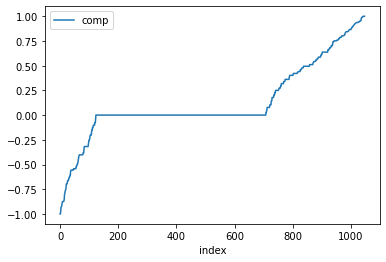

In [10]:
# All sentences
tmp = sentiment_df[['word','comp']].sort_values(by=['comp']).reset_index(drop=True)
tmp.reset_index(inplace=True)
tmp.plot.line(x="index", y="comp")

In [11]:
def print_sent_by_word(word):
    tmp = sentiment_df[sentiment_df['word'] == word][['word', 'sent']]
    for index, row in tmp.iterrows():
        print(row['word'] + ": " + row['sent'])
    print('')

In [12]:
def print_text_by_word(word):
    sents = dataset[dataset['word'] == word]['text'].values
    for sent in sents:
        print(sent + '\n')

In [13]:
def print_worst_sent_by_word(word):
    tmp = sentiment_df[sentiment_df['word'] == word][['word', 'sent', 'comp']]
    row = tmp[tmp.comp == tmp.comp.max()]
    print(row['word'].values + ": " + row['sent'].values)

In [14]:
sentiment_df[['word', 'neg', 'neu', 'pos', 'comp']].sort_values(by=['comp'], ascending=[True]).head(10).word.values

array(['hearing aid', 'hearing aid', 'hearing aid', 'cissy',
       'hearing aid', 'hearing aid', 'sassenach', 'hearing aid',
       'hearing aid', 'baby killer'], dtype=object)

In [15]:
print_worst_sent_by_word('massive rod')

[]


In [16]:
tmp_grouped = grouped_df.reset_index()
number_of_terms = 10
terms = pd.unique(tmp_grouped.head(number_of_terms).word.values)
for term in terms:
    print_worst_sent_by_word(term)

["chinless wonder:  that's classic granito: attempting another fraud  without the slightest awareness that it's painfully obvious.  hey  allison  how much smirnov did it take for the chinless wonder to spread your knees the first time  or did you charge him a fee?. sir atticus macphearson"]
["blue eyed devil: abbigale and coty's wedding ceremony script.  the blue eyed devil.  avon gardens  avon  indiana"]
["saala: r.  madhavan ( saala khadoos): the 'rehnaa hai terre dil mein' actor too gained weight for his recent film 'saala khadoos'. "]
['barking cat: tags. a barking dog activity apps a dog barking animals sounds app developing appdog apps for android barking dog barking dog sound barking dog sounds big dog barking cat sound cool fun apps dog barking noise dog barking sound dog barking sound effects dog barking sounds dog barks dog bark sound dog bark sounds dog noises dog puppy dog dogs barking dogs barking sound dogs barking sounds dog sound dog sound effects dog sounds dogsounds d

In [17]:
number_of_terms = 10
terms = pd.unique(sentiment_df[['word', 'neg', 'neu', 'pos', 'comp']].sort_values(by=['comp'], ascending=[True]).head(number_of_terms).word.values)
for term in terms:
    print_worst_sent_by_word(term)

['hearing aid: all categories business services abad project management services abrasion resistant coatings academic research services academic writing services account management service account planning services acoustic treatment services acute toxicity studies ad campaigns ad copywriting service ad film making ad shoot coordinator advanced email hosting service advertisement booking agents advertisement publishing services advertising agency advertising analytics advertising communications services advertising consultancy services advertising copywriting services advertising hoarding painting service advertising management services advertising market research advertising movie advertising programs service advertising research services advertising service aerial advertisement affiliate marketing management service affiliate marketing service after sales service aggregate testing services agile web development agmark registrations agricultural insurance agricultural turnkey projects

In [18]:
search_word = 'meat gazer'
#print_sent_by_word(search_word)
print_text_by_word(search_word)